In [1]:
# import necessary packages
#Import necessary packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering


from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score #model evaluation

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
#getting csv data from google drive
url='https://drive.google.com/file/d/1sX4PEmbEnY4vPFkVhVJAX5X7F2PqKuF3/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url)
data = data.replace(',','.', regex=True)
data.head()

Unnamed: 0  Happiness Rank      Country          Region Happiness Score  \
0           0               1  Switzerland  Western Europe           7.587   
1           1               2      Iceland  Western Europe           7.561   
2           2               3      Denmark  Western Europe           7.527   
3           3               4       Norway  Western Europe           7.522   
4           4               5       Canada   North America           7.427   

  Economy (GDP per Capita) Family (Social Support) Health (Life Expectancy)  \
0                  1.39651                 1.34951                  0.94143   
1                  1.30232                 1.40223                  0.94784   
2                  1.32548                 1.36058                  0.87464   
3                    1.459                 1.33095                  0.88521   
4                  1.32629                 1.32261                  0.90563   

   Freedom Trust (Government Corruption) Generosity  Year  
0  0.66557                       0.41978    0.29678  2015  
1  0.62877                       0.14145     0.4363  2015  
2  0.64938                       0.48357    0.34139  2015  
3  0.66973                       0.36503    0.34699  2015  
4  0.63297                       0.32957    0.45811  2015

In [3]:
data["New_Region"] = data["Region"]

data.loc[data["New_Region"] == "Australia and New Zealand", "New_Region"] = "Australia"

data.loc[data["New_Region"] == "Central and Eastern Europe", "New_Region"] = "Europe"
data.loc[data["New_Region"] == "Commonwealth of Independent States", "New_Region"] = "Europe"
data.loc[data["New_Region"] == "Western Europe", "New_Region"] = "Europe"

data.loc[data["New_Region"] == "North America", "New_Region"] = "North America"
data.loc[data["New_Region"] == "North America and ANZ", "New_Region"] = "North America"

data.loc[data["New_Region"] == "Middle East and North Africa", "New_Region"] = "Middle East and Africa"
data.loc[data["New_Region"] == "Middle East and Northern Africa", "New_Region"] = "Middle East and Africa"
data.loc[data["New_Region"] == "Sub-Saharan Africa", "New_Region"] = "Middle East and Africa"

data.loc[data["New_Region"] == "East Asia", "New_Region"] = "Asia"
data.loc[data["New_Region"] == "Eastern Asia", "New_Region"] = "Asia"
data.loc[data["New_Region"] == "South Asia", "New_Region"] = "Asia"
data.loc[data["New_Region"] == "Southeast Asia", "New_Region"] = "Asia"
data.loc[data["New_Region"] == "Southeastern Asia", "New_Region"] = "Asia"
data.loc[data["New_Region"] == "Southern Asia", "New_Region"] = "Asia"

data.head()

Unnamed: 0  Happiness Rank      Country          Region Happiness Score  \
0           0               1  Switzerland  Western Europe           7.587   
1           1               2      Iceland  Western Europe           7.561   
2           2               3      Denmark  Western Europe           7.527   
3           3               4       Norway  Western Europe           7.522   
4           4               5       Canada   North America           7.427   

  Economy (GDP per Capita) Family (Social Support) Health (Life Expectancy)  \
0                  1.39651                 1.34951                  0.94143   
1                  1.30232                 1.40223                  0.94784   
2                  1.32548                 1.36058                  0.87464   
3                    1.459                 1.33095                  0.88521   
4                  1.32629                 1.32261                  0.90563   

   Freedom Trust (Government Corruption) Generosity  Year     New_Region  
0  0.66557                       0.41978    0.29678  2015         Europe  
1  0.62877                       0.14145     0.4363  2015         Europe  
2  0.64938                       0.48357    0.34139  2015         Europe  
3  0.66973                       0.36503    0.34699  2015         Europe  
4  0.63297                       0.32957    0.45811  2015  North America

Question 1.

Since the dataset is focused on predicting happiness score, which of the predictors is the most influential and what type of relationship do they have with the happiness score? Which of the variables are least significant and can possibly be removed from the model?

In [4]:
#set the variables
predictors = ["Economy (GDP per Capita)","Family (Social Support)","Health (Life Expectancy)",
                   "Freedom","Trust (Government Corruption)","Generosity"]
X = data[predictors]
y = data["Happiness Score"]

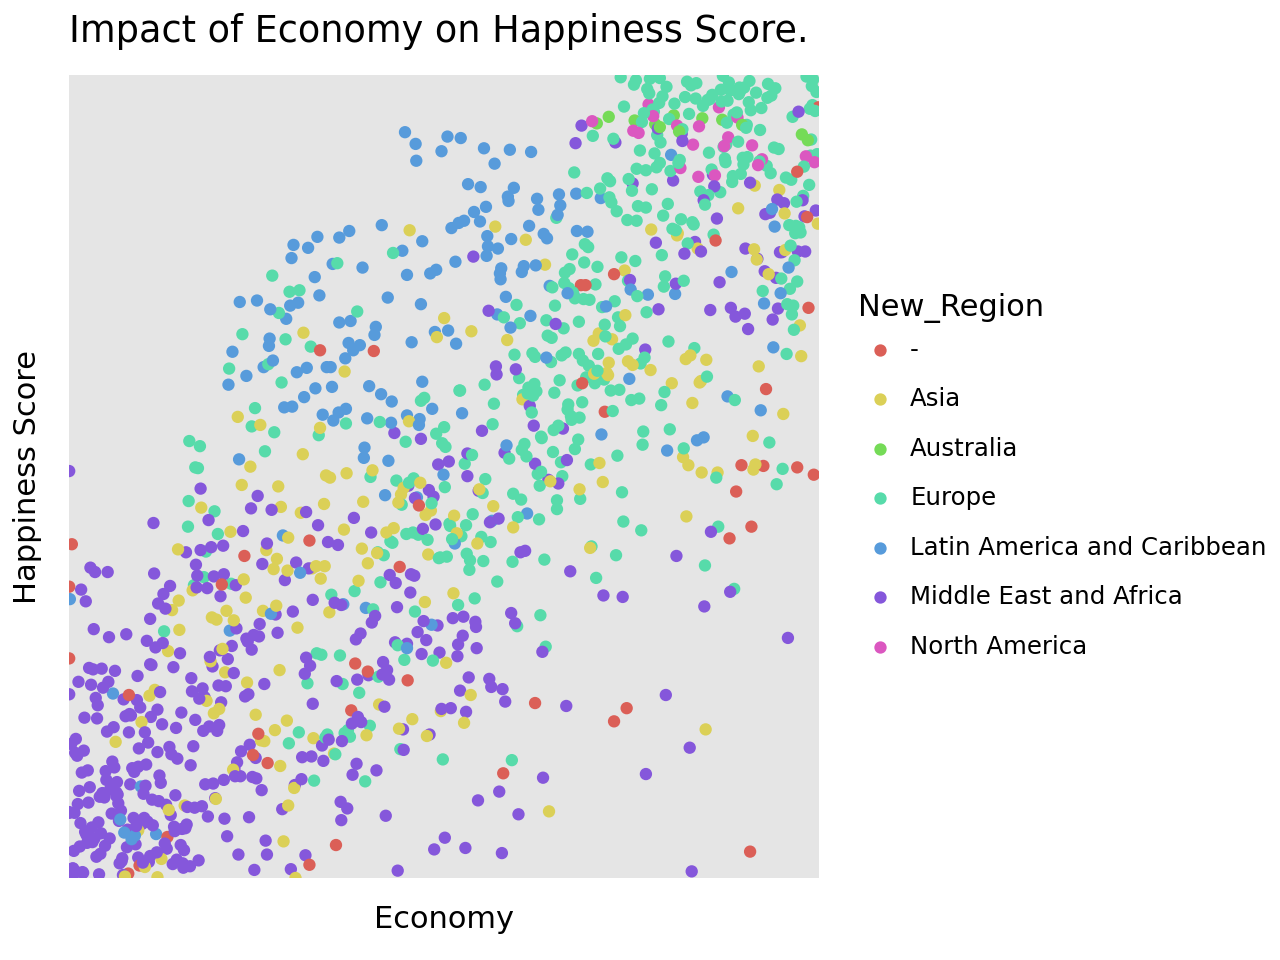

<Figure Size: (640 x 480)>

In [5]:
(ggplot(data, aes(x = "Economy (GDP per Capita)", y = "Happiness Score", color = "New_Region")) + \
 geom_point() + theme_minimal() + ggtitle("Impact of Economy on Happiness Score.") + labs(x = "Economy", y = "Happiness Score") + \
 theme(axis_text_x = element_blank(), axis_text_y = element_blank()))

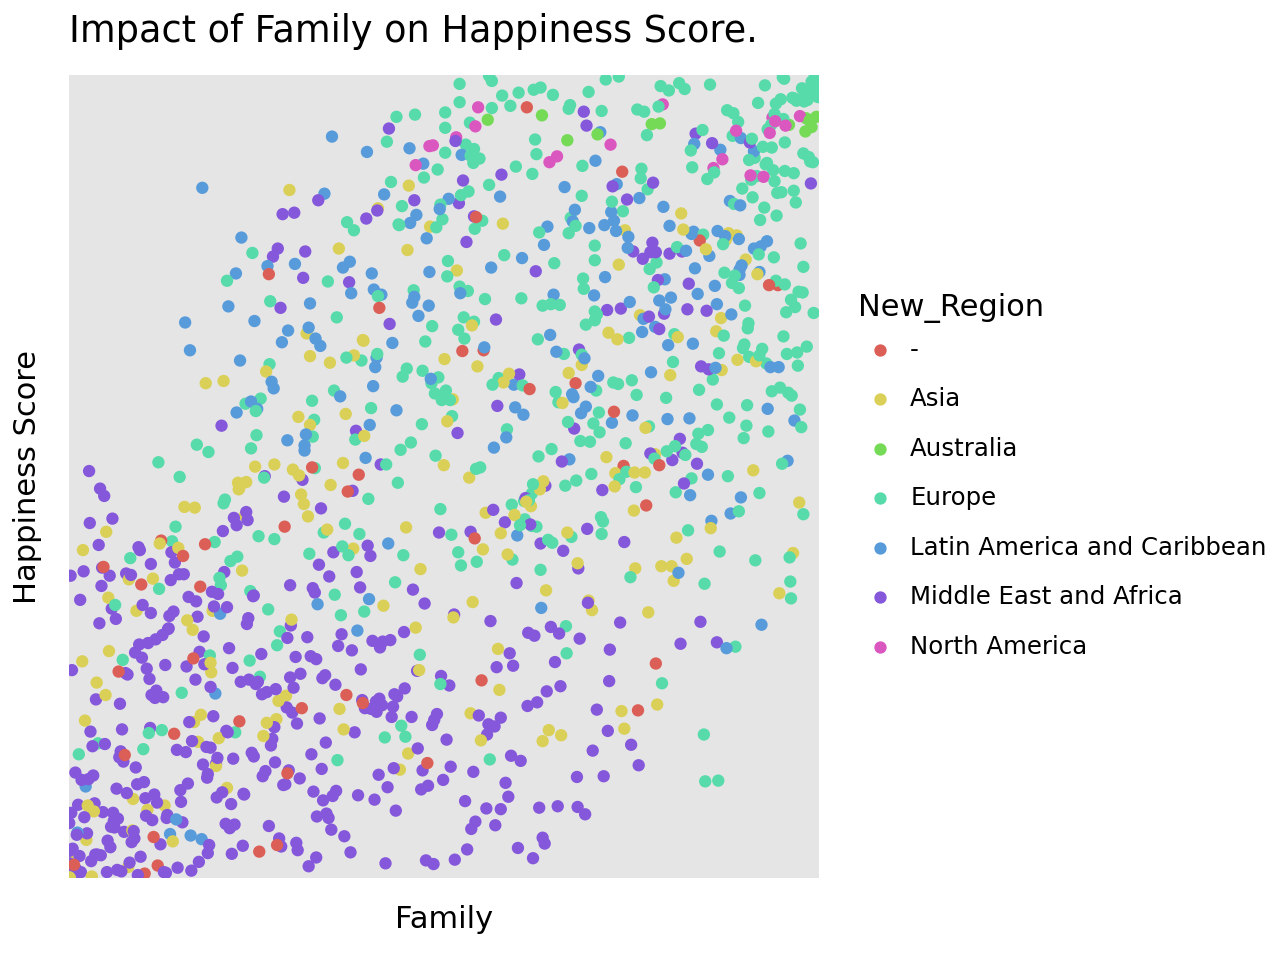

<Figure Size: (640 x 480)>

In [6]:
(ggplot(data, aes(x = "Family (Social Support)", y = "Happiness Score", color = "New_Region")) + geom_point() + \
 theme_minimal() + ggtitle("Impact of Family on Happiness Score.") + labs(x = "Family", y = "Happiness Score") + \
 theme(axis_text_x = element_blank(), axis_text_y = element_blank()))

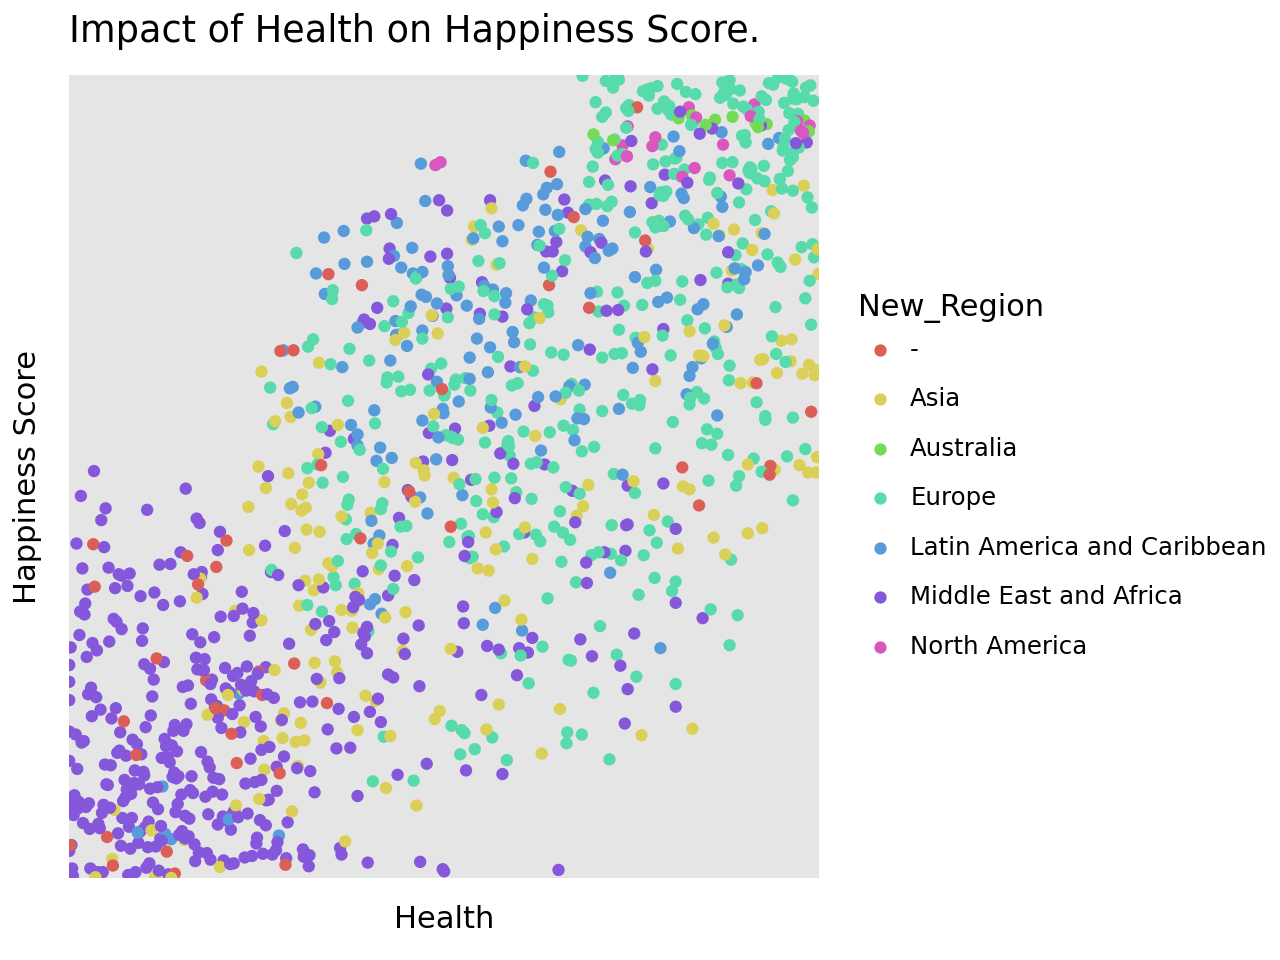

<Figure Size: (640 x 480)>

In [7]:
(ggplot(data, aes(x = "Health (Life Expectancy)", y = "Happiness Score", color = "New_Region")) + geom_point() + \
 theme_minimal() + ggtitle("Impact of Health on Happiness Score.") + labs(x = "Health", y = "Happiness Score") + \
 theme(axis_text_x = element_blank(), axis_text_y = element_blank()))

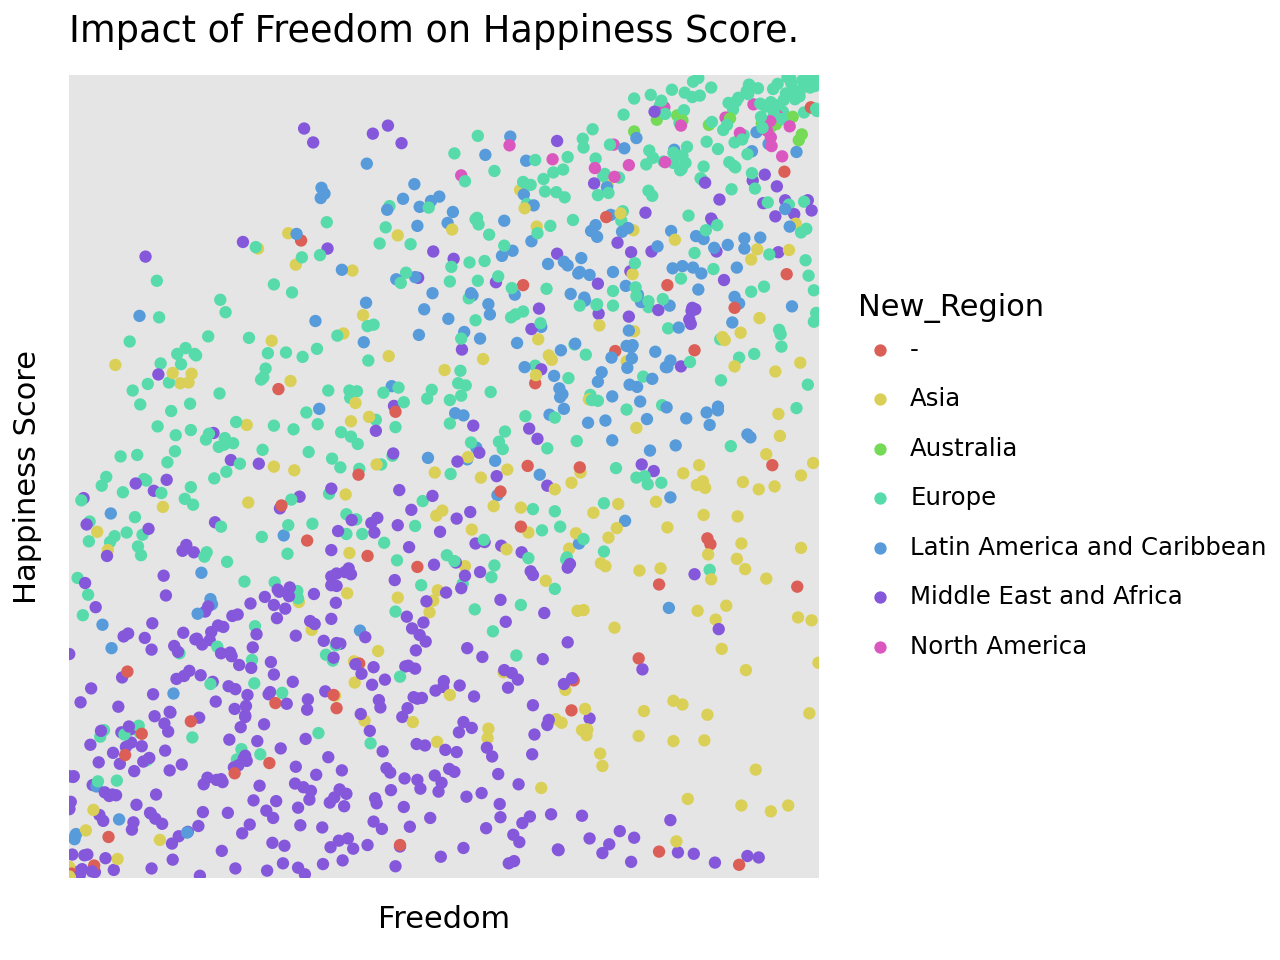

<Figure Size: (640 x 480)>

In [8]:
(ggplot(data, aes(x = "Freedom", y = "Happiness Score", color = "New_Region")) + geom_point() + \
 theme_minimal() + ggtitle("Impact of Freedom on Happiness Score.") + labs(x = "Freedom", y = "Happiness Score") + \
 theme(axis_text_x = element_blank(), axis_text_y = element_blank()))

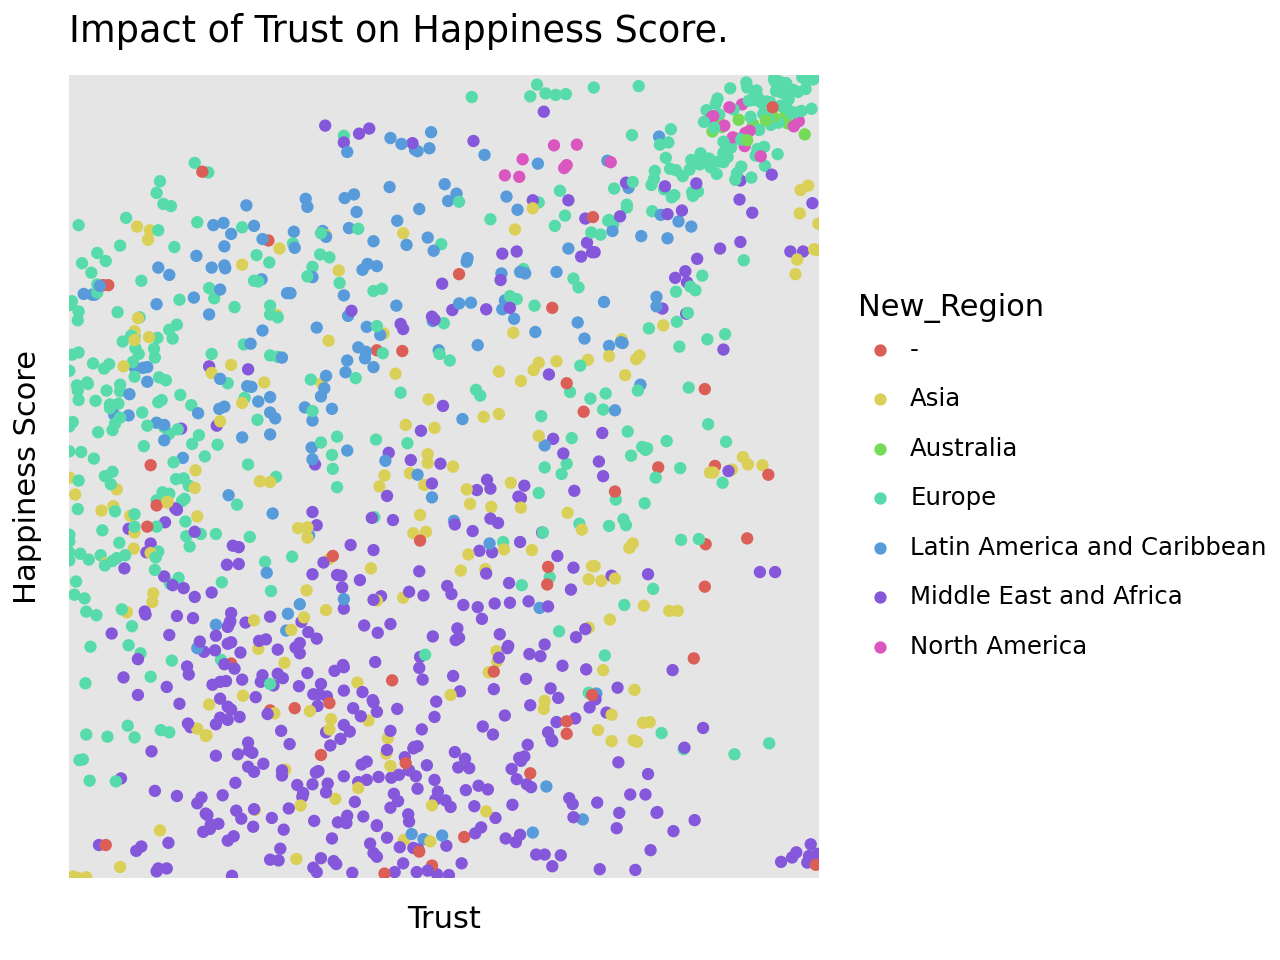

<Figure Size: (640 x 480)>

In [9]:
(ggplot(data, aes(x = "Trust (Government Corruption)", y = "Happiness Score", color = "New_Region")) + geom_point() + \
 theme_minimal() + ggtitle("Impact of Trust on Happiness Score.") + labs(x = "Trust", y = "Happiness Score") + \
 theme(axis_text_x = element_blank(), axis_text_y = element_blank()))

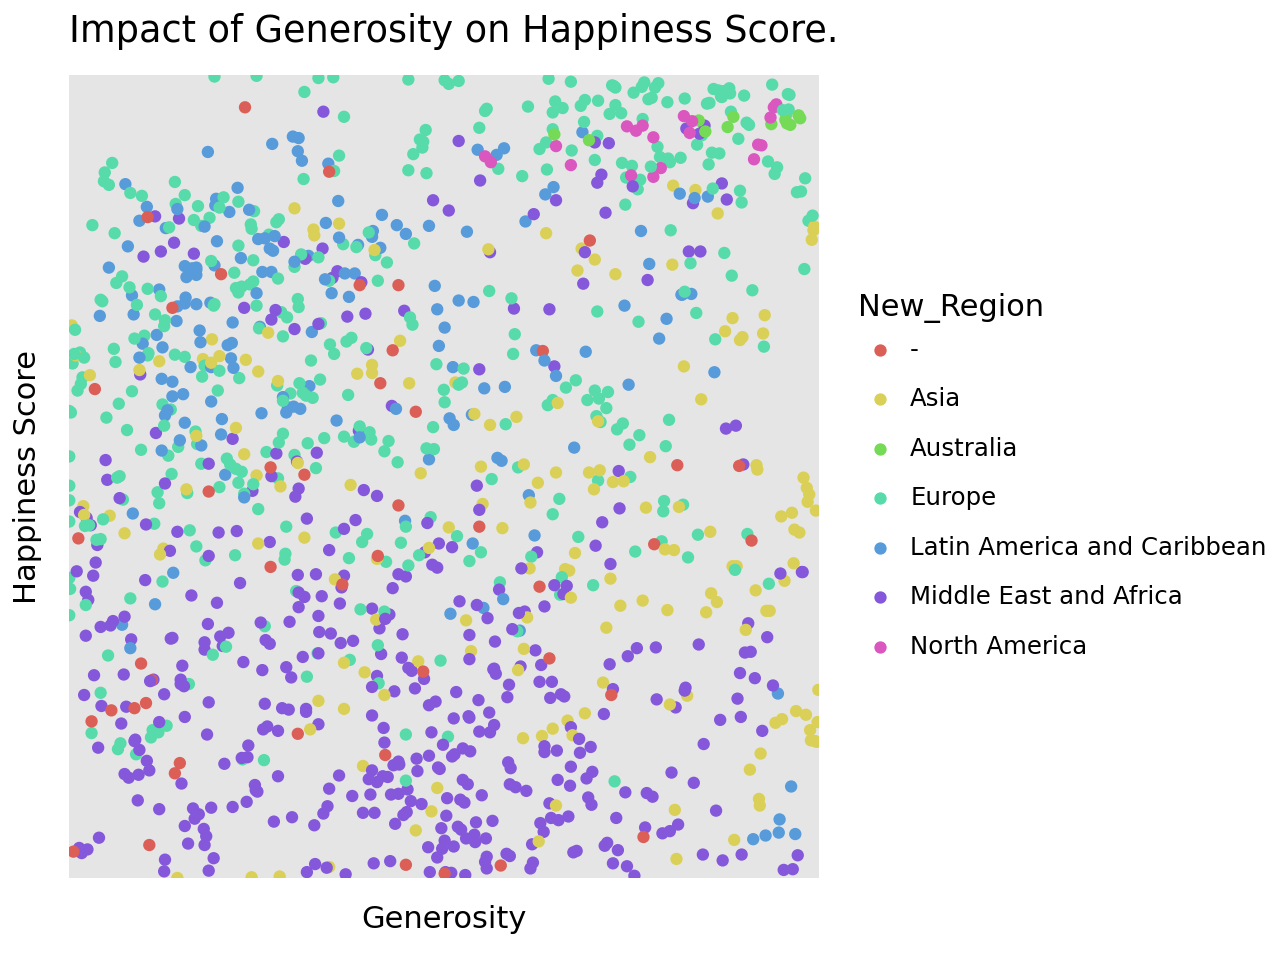

<Figure Size: (640 x 480)>

In [10]:
(ggplot(data, aes(x = "Generosity", y = "Happiness Score", color = "New_Region")) + geom_point() + \
 theme_minimal() + ggtitle("Impact of Generosity on Happiness Score.") + labs(x = "Generosity", y = "Happiness Score") + \
 theme(axis_text_x = element_blank(), axis_text_y = element_blank()))

The first two variables seem to have a pretty linear relationship with the happiness score. The data points are still spread apart a lot but we can see a clear trend upwards.

The next two variables also seem to have linear relationships. Health definitely has a stronger one because the data points are less spread apart. Freedom still has some sort of linearity but the data points are really spread apart.

The last two variables don’t seem to have much of a linear relationship with happiness score. The data points are spread all across the graph and there is no pattern. These two variables could potentially be removed later on when trying to improve our model.

In [11]:
#creating a linear regression model
X_train, X_test, y_train, y_test = train_test_split(data[predictors],y, test_size = 0.2)

z = StandardScaler()
z.fit(X_train)

X_train = z.transform(X_train)
X_test = z.transform(X_test)

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)

#getting the different predictions
y_train_preds = lr.predict(X_train)
#error_train = y_train - y_train_preds
assump_train = pd.DataFrame({"predicted":y_train_preds,"actual":y_train})

y_test_preds = lr.predict(X_test)
#error_test = y_test - y_test_preds
assump_test = pd.DataFrame({"predicted":y_test_preds,"actual":y_test})

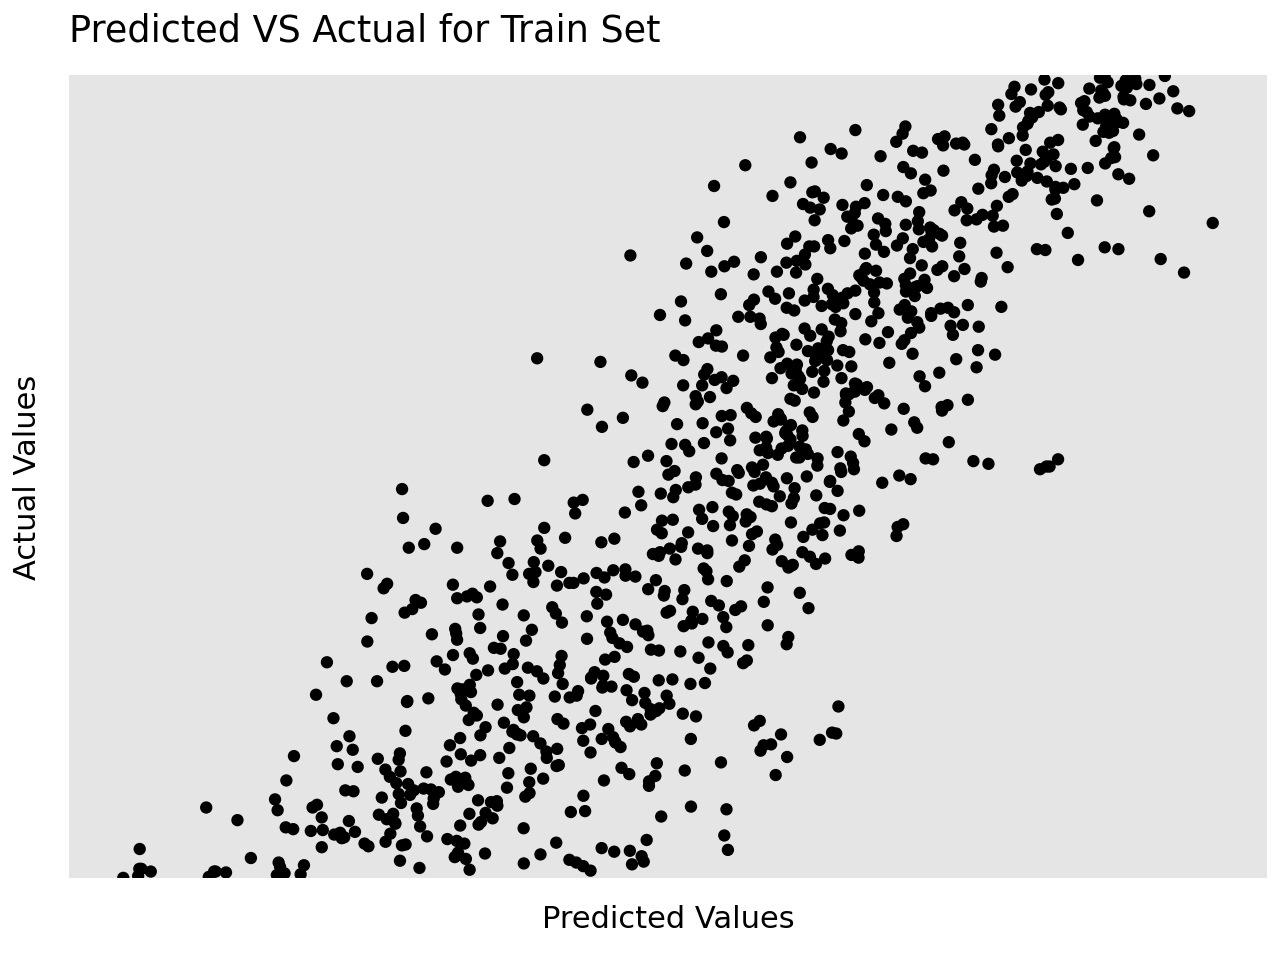

<Figure Size: (640 x 480)>

In [13]:
(ggplot(assump_train, aes(x = "predicted", y = "actual")) + geom_point() + theme_minimal() + \
 ggtitle("Predicted VS Actual for Train Set") + labs(x = "Predicted Values", y = "Actual Values") + \
 theme(axis_text_x = element_blank(), axis_text_y = element_blank()))

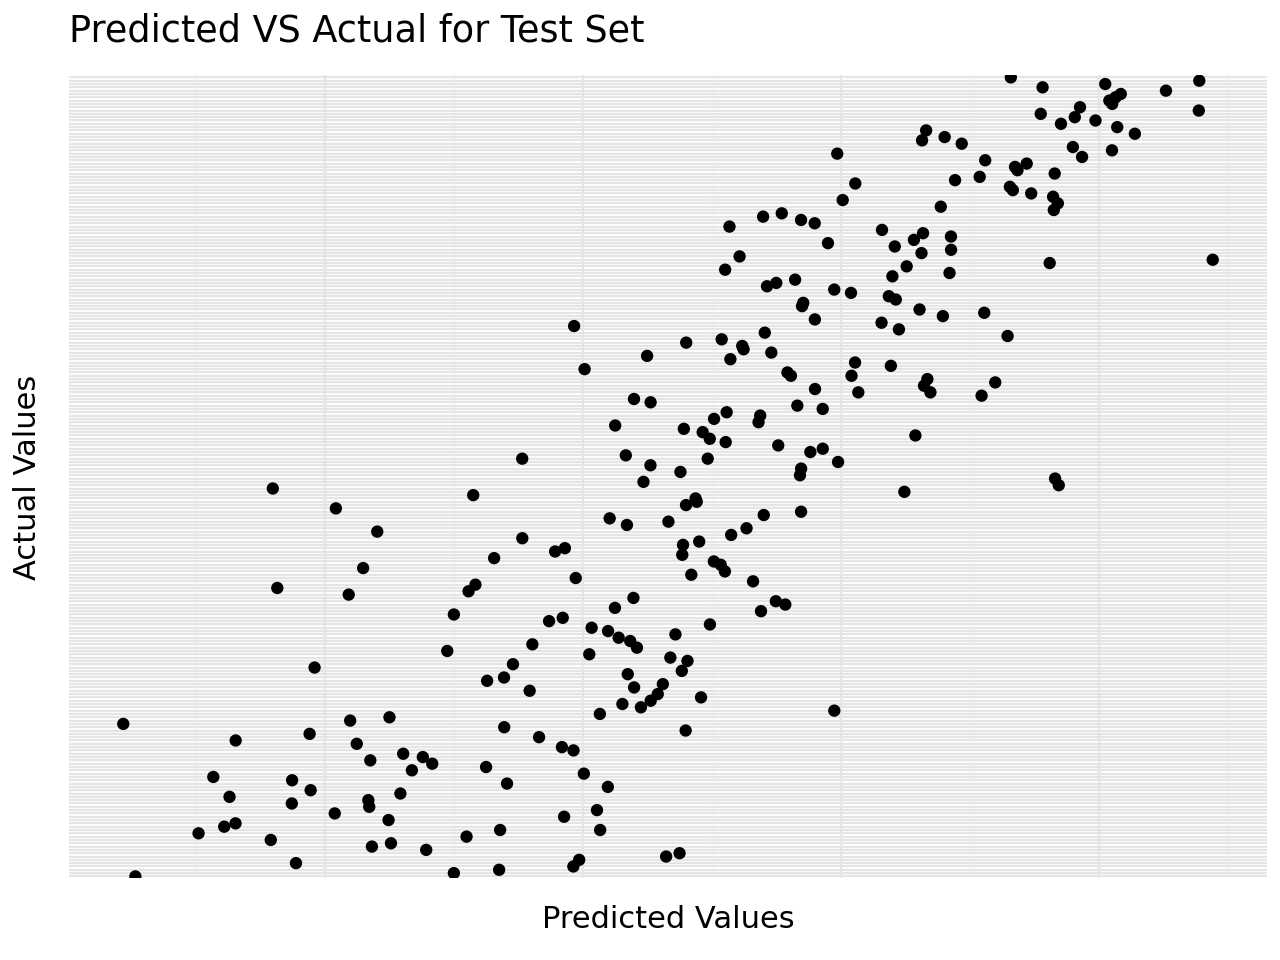

<Figure Size: (640 x 480)>

In [14]:
(ggplot(assump_test, aes(x = "predicted", y = "actual")) + geom_point() + theme_minimal() + \
 ggtitle("Predicted VS Actual for Test Set") + labs(x = "Predicted Values", y = "Actual Values") + \
 theme(axis_text_x = element_blank(), axis_text_y = element_blank()))

In [15]:
#model validation
print("For the Train Set")
print("MSE:",mean_squared_error(y_train,y_train_preds))
print("R^2:",r2_score(y_train,y_train_preds))

print("For the Test Set")
print("MSE:",mean_squared_error(y_test,y_test_preds))
print("R^2:",r2_score(y_test,y_test_preds))

For the Train Set
MSE: 0.3115793620624488
R^2: 0.7506867890588385
For the Test Set
MSE: 0.35463356044742883
R^2: 0.7070388636753167


The MSE for both sets seem to be relatively low. The R^2 value is around 75% for the test set and 74% for our training set. Since the R^2 value for the training set is lower so we can say our model is not overfit.

In [16]:
coefficients = pd.DataFrame({"Coefficients":lr.coef_,"Name":predictors})

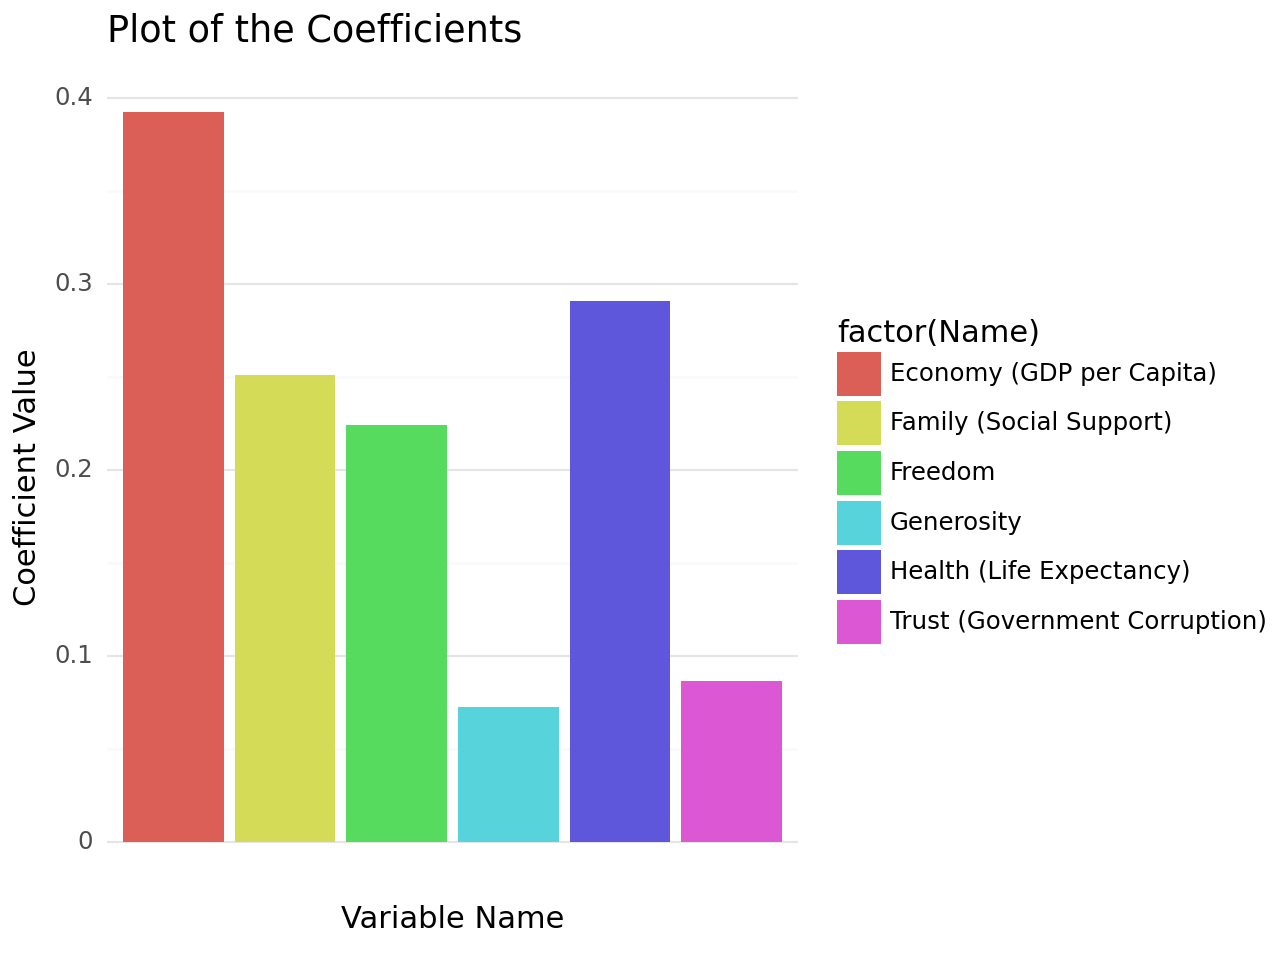

<Figure Size: (640 x 480)>

In [17]:
(ggplot(coefficients, aes(x = "Name", y = "Coefficients", fill = "factor(Name)")) + geom_bar(stat = "identity") + theme_minimal() + \
 ggtitle("Plot of the Coefficients") + labs(x = "Variable Name", y = "Coefficient Value") + \
 theme(panel_grid_major_x = element_blank(), axis_text_x = element_blank()))

In [18]:
coefficients

Coefficients                           Name
0      0.392448       Economy (GDP per Capita)
1      0.250844        Family (Social Support)
2      0.290902       Health (Life Expectancy)
3      0.223862                        Freedom
4      0.086571  Trust (Government Corruption)
5      0.072429                     Generosity

Answer for Question 1

Looking at the coefficients we have as a result of our linear regression model we see that we have low coefficients for generosity and trust which are the same two variables that didn’t have a linear relationship with the happiness score. We can also identify our most influential variables which are economy, health and freedom because they have the biggest coefficients.

We supported our theory of possibly removing trust and generosity to better our model because of their weak linear relationship with happiness score and their low coefficients.


Question 2

How much of a difference do we see in the mean absolute error when comparing the model with all the predicting variables to a model using PCA that retains enough PC’s to keep 85% of the variance in the data? Can we compare the results with those of a Lasso Model to check which variables would be considered noise?

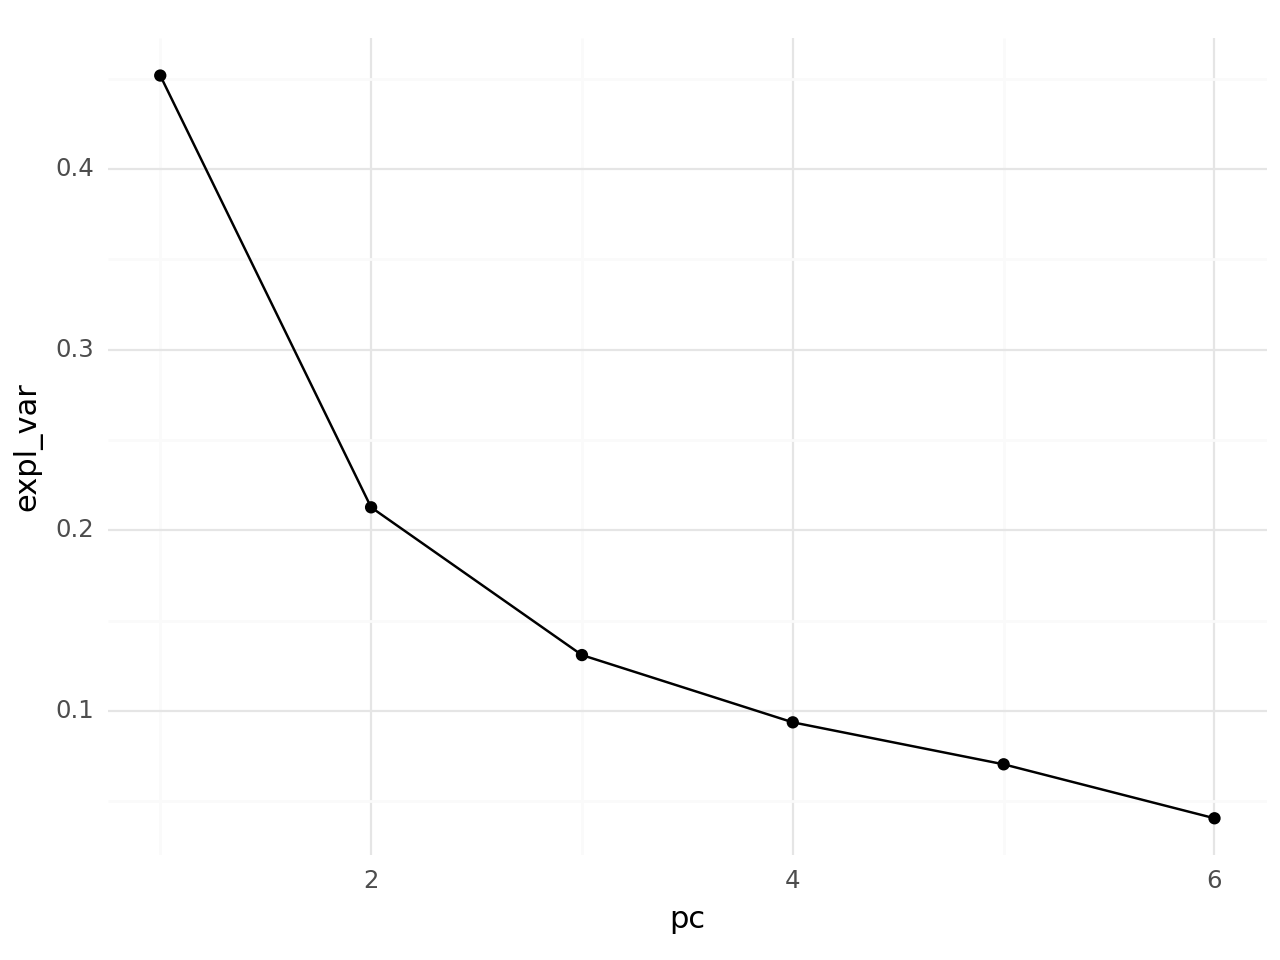

<Figure Size: (640 x 480)>

In [19]:
#pca moment
pca = PCA()
pca.fit(X_train)

pca_df = pd.DataFrame({"expl_var" : pca.explained_variance_ratio_, "pc": range(1,7), "cum_var": pca.explained_variance_ratio_.cumsum()})

(ggplot(pca_df, aes(x = "pc", y = "expl_var")) + geom_line() + geom_point()) +theme_minimal()

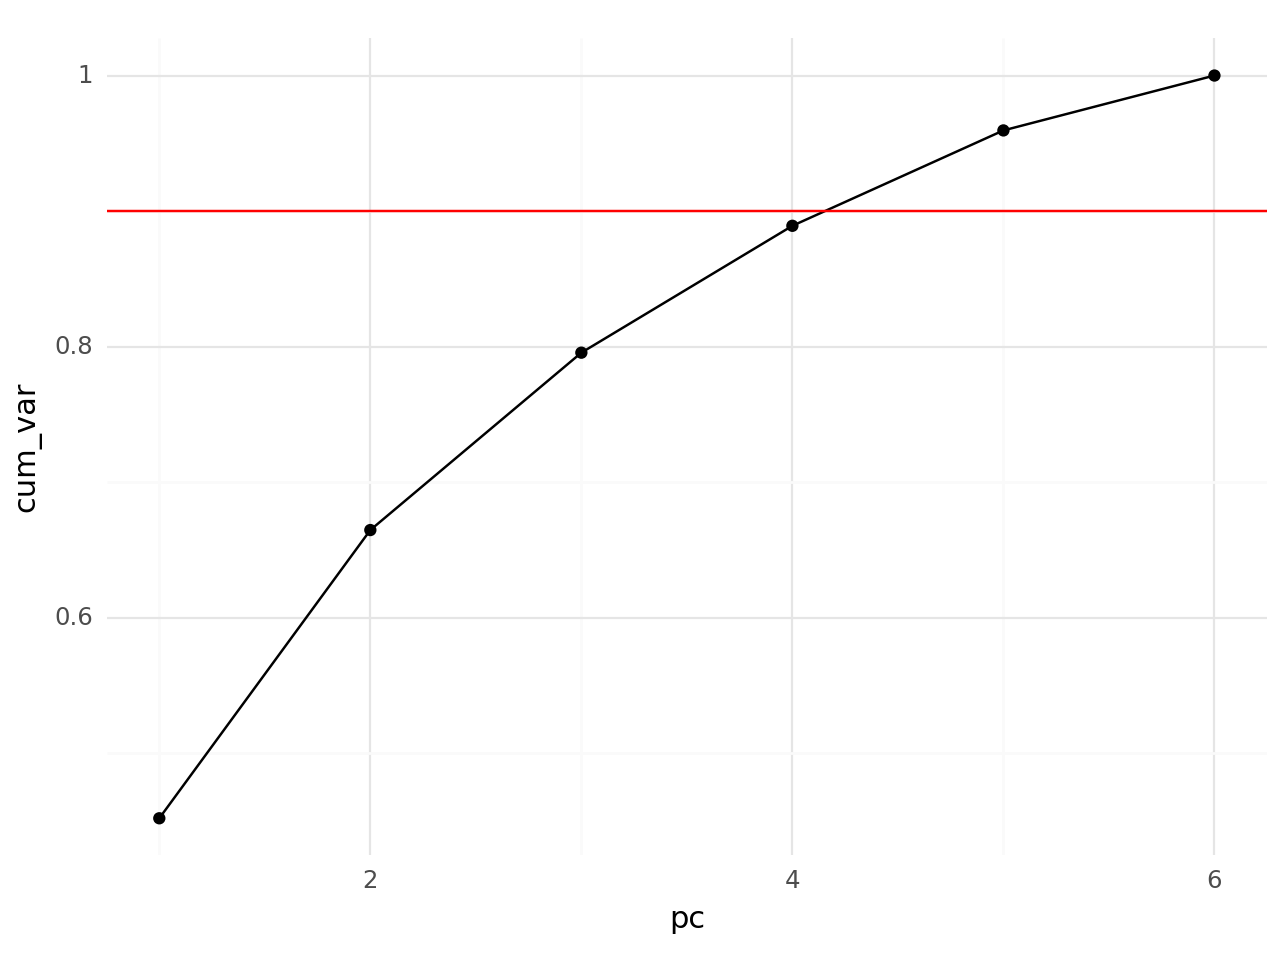

<Figure Size: (640 x 480)>

In [20]:
(ggplot(pca_df, aes(x = "pc", y = "cum_var")) + geom_line() +
 geom_point() + geom_hline(yintercept = 0.90, color = "red"))+ theme_minimal()

From the PCA graph we see that we can use 4 variables and still maintain 90% of the variance. To figure out which variables to keep and which to remove lets look at a Lasso Model.

In [21]:
lsr = Lasso(alpha = 0.2)

lsr.fit(X_train,y_train)

coefficients_lsr = pd.DataFrame({"Coefficients":lsr.coef_,"Name":predictors})
print("TEST : ", r2_score(y_test, lsr.predict(X_test)))
coefficients_lsr

TEST :  0.6363240280637584


Coefficients                           Name
0      0.318961       Economy (GDP per Capita)
1      0.144945        Family (Social Support)
2      0.258390       Health (Life Expectancy)
3      0.154903                        Freedom
4      0.000000  Trust (Government Corruption)
5      0.000000                     Generosity

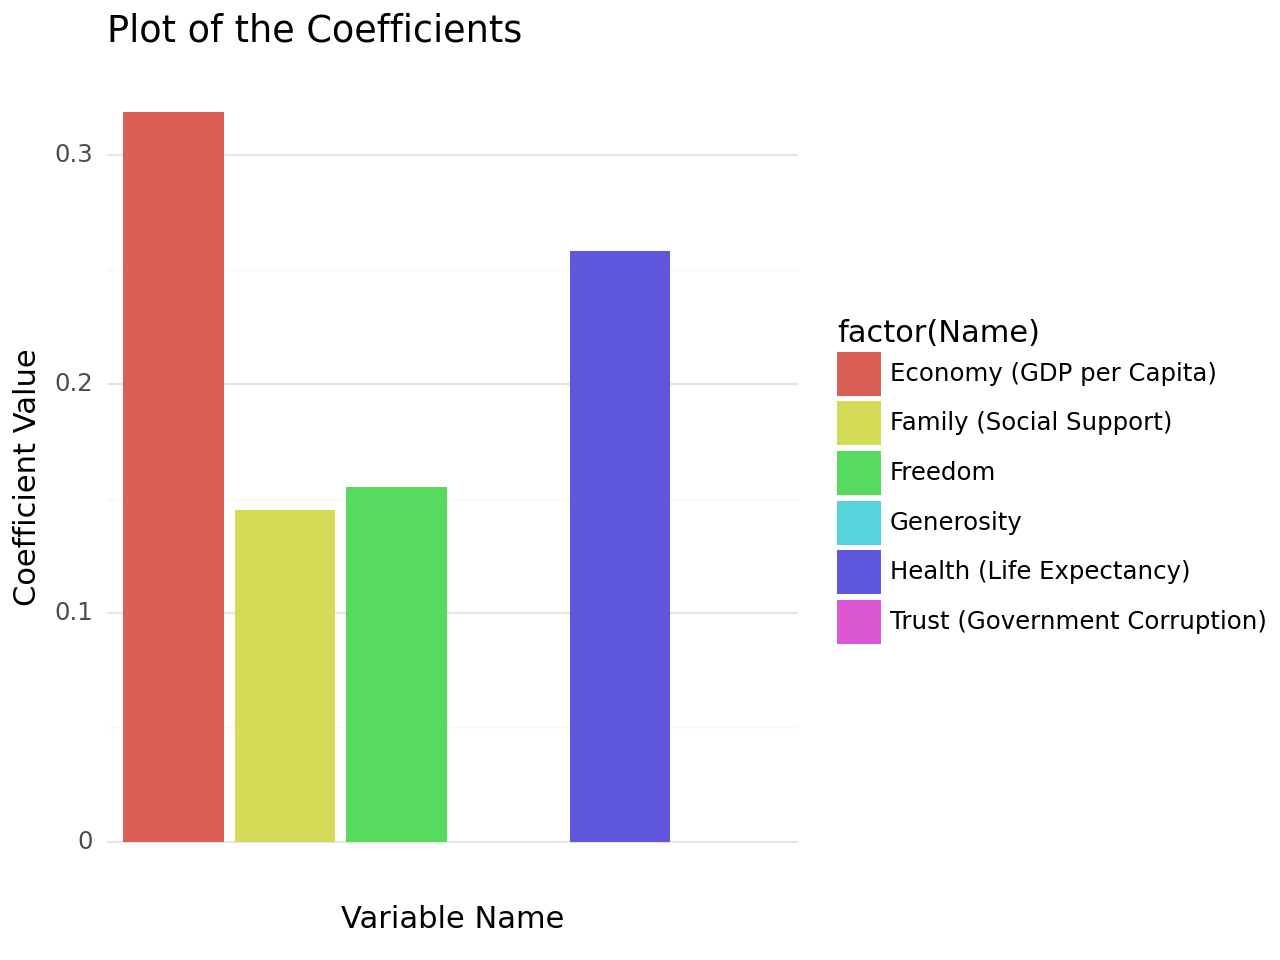

<Figure Size: (640 x 480)>

In [22]:
(ggplot(coefficients_lsr, aes(x = "Name", y = "Coefficients", fill = "factor(Name)")) + geom_bar(stat = "identity") + theme_minimal() + \
 ggtitle("Plot of the Coefficients") + labs(x = "Variable Name", y = "Coefficient Value") + \
 theme(panel_grid_major_x = element_blank(), axis_text_x = element_blank()))

In [23]:
print("TRAIN: ", r2_score(y_train, lsr.predict(X_train)))
print("TEST : ", r2_score(y_test, lsr.predict(X_test)))

TRAIN:  0.6870961382733789
TEST :  0.6363240280637584


Looking at the coefficients we can see that two variables shurnk down to 0 and to further understand how removing these variables from our model I will remake the model.

In [24]:
#set the variables
predictors2 = ["Economy (GDP per Capita)","Family (Social Support)",
              "Health (Life Expectancy)","Freedom"]
X2 = data[predictors]
y2 = data["Happiness Score"]

In [25]:
#creating a linear regression model
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size = 0.2)

z2 = StandardScaler()
z2.fit(X2_train)

X2_train = z2.transform(X2_train)
X2_test = z2.transform(X2_test)

lr2 = LinearRegression()
lr2.fit(X2_train, y2_train)

LinearRegression()

In [26]:
#getting the different predictions
y2_train_preds = lr2.predict(X2_train)
#error_train = y_train - y_train_preds
assump2_train = pd.DataFrame({"predicted":y2_train_preds,"actual":y2_train})

y2_test_preds = lr2.predict(X2_test)
#error_test = y_test - y_test_preds
assump2_test = pd.DataFrame({"predicted":y2_test_preds,"actual":y2_test})

In [27]:
#model validation
print("For the Train Set")
print("MSE:",mean_squared_error(y2_train,y2_train_preds))
print("R^2:",r2_score(y2_train,y2_train_preds))

print("For the Test Set")
print("MSE:",mean_squared_error(y2_test,y2_test_preds))
print("R^2:",r2_score(y2_test,y2_test_preds))

For the Train Set
MSE: 0.31101843395890144
R^2: 0.754902287972126
For the Test Set
MSE: 0.3580339533592202
R^2: 0.6838762576852466


In [28]:
coefficients2 = pd.DataFrame({"Coefficients":lr2.coef_,"Name":predictors})
coefficients2

Coefficients                           Name
0      0.414155       Economy (GDP per Capita)
1      0.239395        Family (Social Support)
2      0.280102       Health (Life Expectancy)
3      0.247658                        Freedom
4      0.079111  Trust (Government Corruption)
5      0.098917                     Generosity

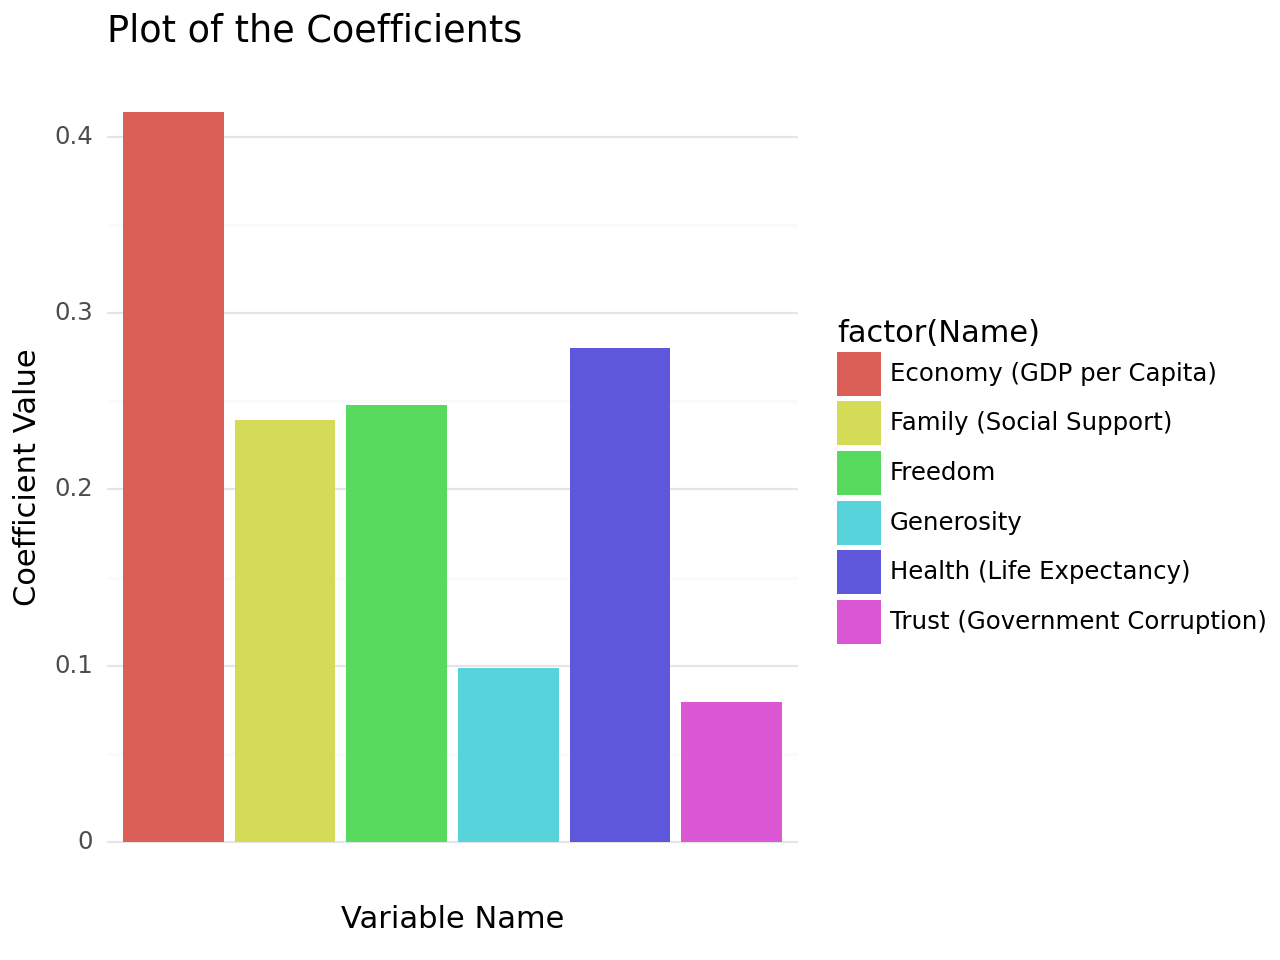

<Figure Size: (640 x 480)>

In [29]:
(ggplot(coefficients2, aes(x = "Name", y = "Coefficients", fill = "factor(Name)")) + geom_bar(stat = "identity") + theme_minimal() + \
 ggtitle("Plot of the Coefficients") + labs(x = "Variable Name", y = "Coefficient Value") + \
 theme(panel_grid_major_x = element_blank(), axis_text_x = element_blank()))

Answer for Question 2

The results from our PCA tells us that we can use 4 variables instead of 6 but still manage to keep 90% of the variance in our data. To check which variables we could keep we looked at a Lasso Model.

The results of the Lasso Model showed us two variables that completely shrunk down to 0 which are trust and generosity, which are the same variables we identified as removable in Question 1.

I also remade the regression model using just the four variables to see how the model is affected. When comparing the results for both we see that the MSE values are around the same and the R^2 value only decreased a little from 75% to 73% which is expected because we have fewer variables. Overall the model is performing the same so we can say trust and generosity can be removed.

Question 3

When considering the three most influential variables, in our case Economy, Health and Freedom, what kind of clusters do we get, and what conclusions can we draw about the characteristics of those clusters? Can we factor in regions to further expand the model? What kind of pattern do we see between the two graphs (one where we use the clusters as the factor and one where we use regions as the factor) for each of the variables?

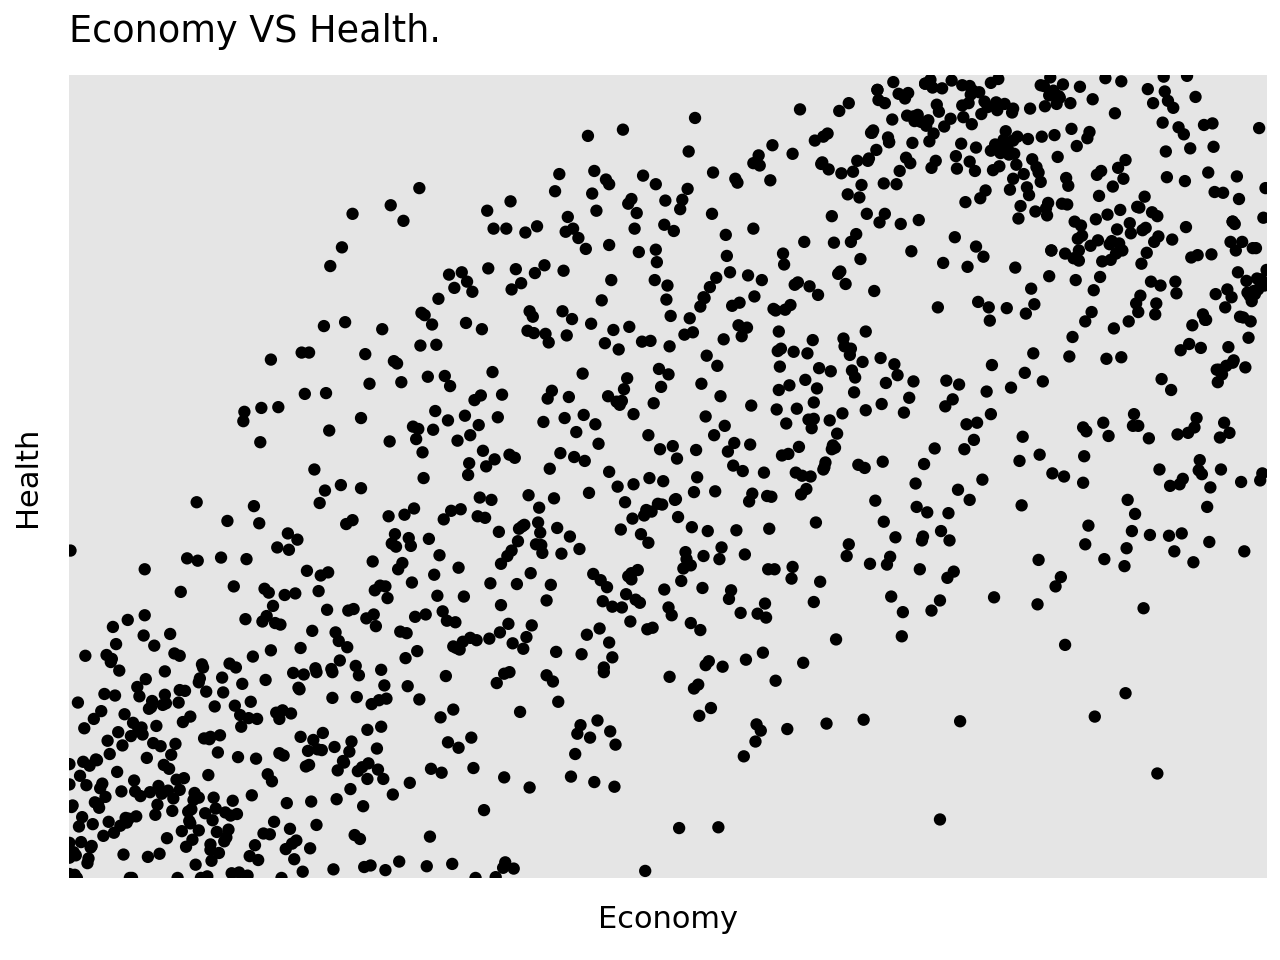

In [30]:
print(ggplot(data, aes(x = "Economy (GDP per Capita)", y = "Health (Life Expectancy)")) + geom_point() + theme_minimal() + \
 ggtitle("Economy VS Health.") + labs(x = "Economy", y = "Health") + \
 theme(axis_text_x = element_blank(), axis_text_y = element_blank()))

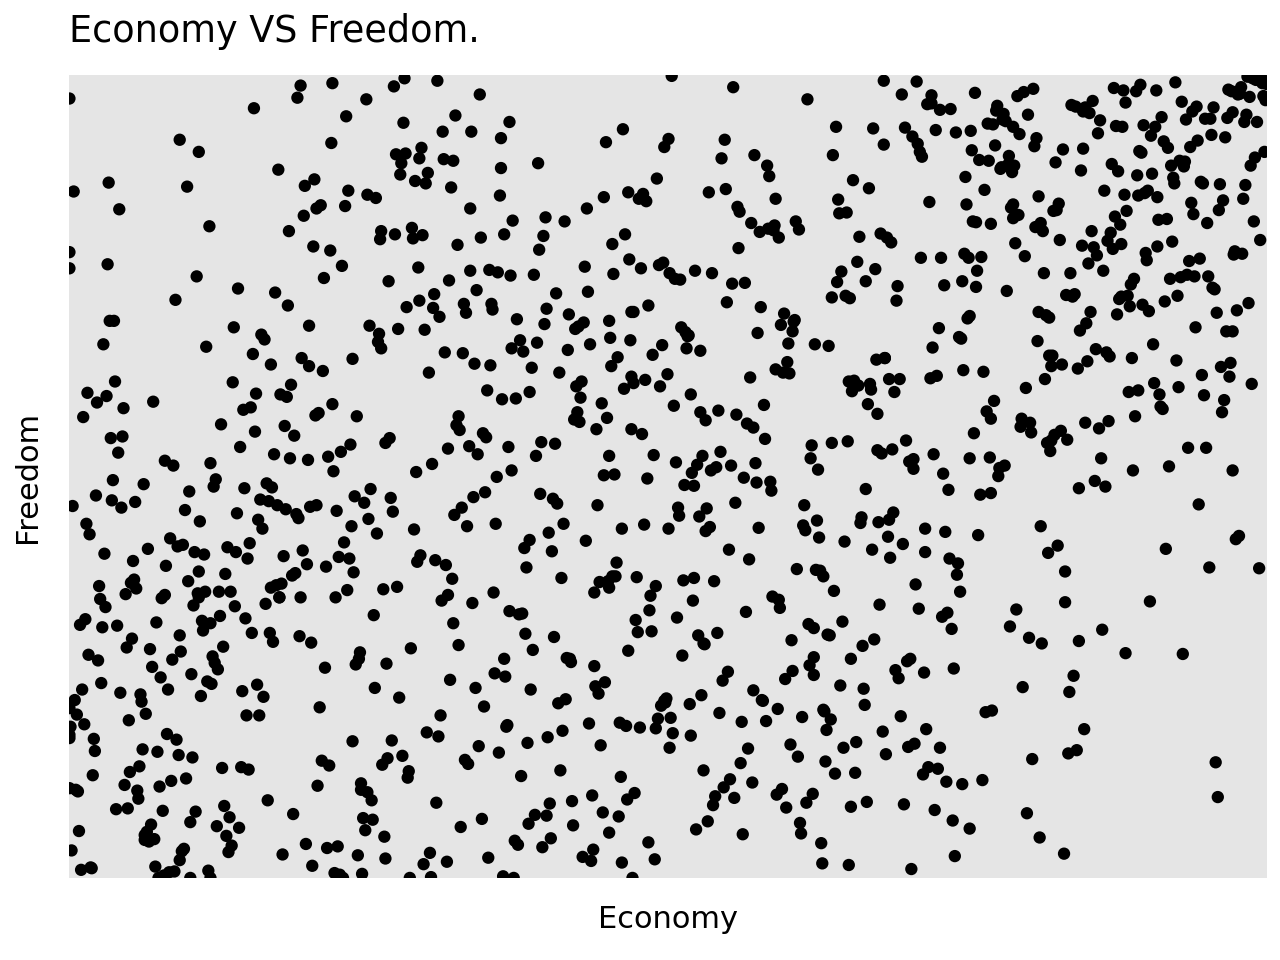

In [31]:
print(ggplot(data, aes(x = "Economy (GDP per Capita)", y = "Freedom")) + geom_point() + theme_minimal() + \
 ggtitle("Economy VS Freedom.") + labs(x = "Economy", y = "Freedom") + \
 theme(axis_text_x = element_blank(), axis_text_y = element_blank()))

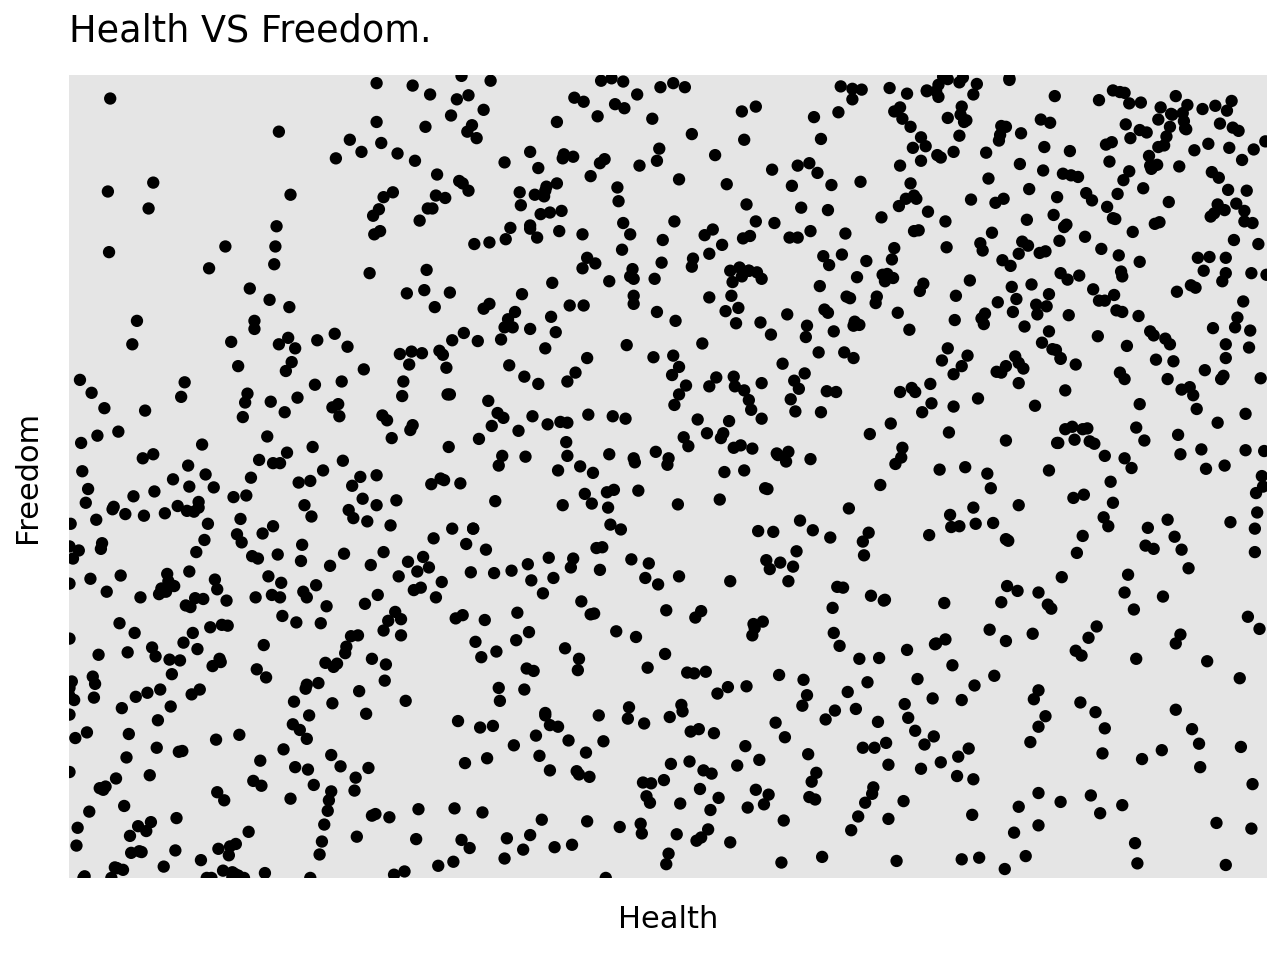

In [32]:
print(ggplot(data, aes(x = "Health (Life Expectancy)", y = "Freedom")) + geom_point() + theme_minimal() + \
 ggtitle("Health VS Freedom.") + labs(x = "Health", y = "Freedom") + \
 theme(axis_text_x = element_blank(), axis_text_y = element_blank()))

I plotted each of the variables against each other to identify which clustering method would be the best to use.

KMeans would not work as well because we don't really see any spherical clusters and the outcome would most liekly be 1 cluster. DBSCAN won't work that well either because we don't really have areas of different densities and there is a lot of overlap with the data points.
Therefore, Gaussian Mixture Models would be the best to use because we are not restricted to spherical clusters.

In [33]:
#Gaussian
features = ["Economy (GDP per Capita)", "Health (Life Expectancy)", "Freedom"]
X3 = data[features]

z3 = StandardScaler()

X3[features] = z3.fit_transform(X3)

In [34]:
#Choosing a value for n_components
n_components = [2,3,4,5,6,7]

sils = []
for n in n_components:
    EM = GaussianMixture(n_components = n)
    EM.fit(X3)

    cluster = EM.predict(X3)
    data["cluster"] = cluster

    sils.append(silhouette_score(X3, cluster))

print(sils)

[0.3643163047054758, 0.30966982581934527, 0.3337272029140772, 0.32300917577145305, 0.2796316232021579, 0.2669852078173571]


To pick n_components we looked at the different silhouetter scores and picked the best one.

In [35]:
#Using n_components based on highest silhouette score
EM = GaussianMixture(n_components = 2)

EM.fit(X3)

cluster = EM.predict(X3)
data["cluster"] = cluster

print("SILHOUETTE: ", silhouette_score(X3, cluster))


SILHOUETTE:  0.3643163047054758


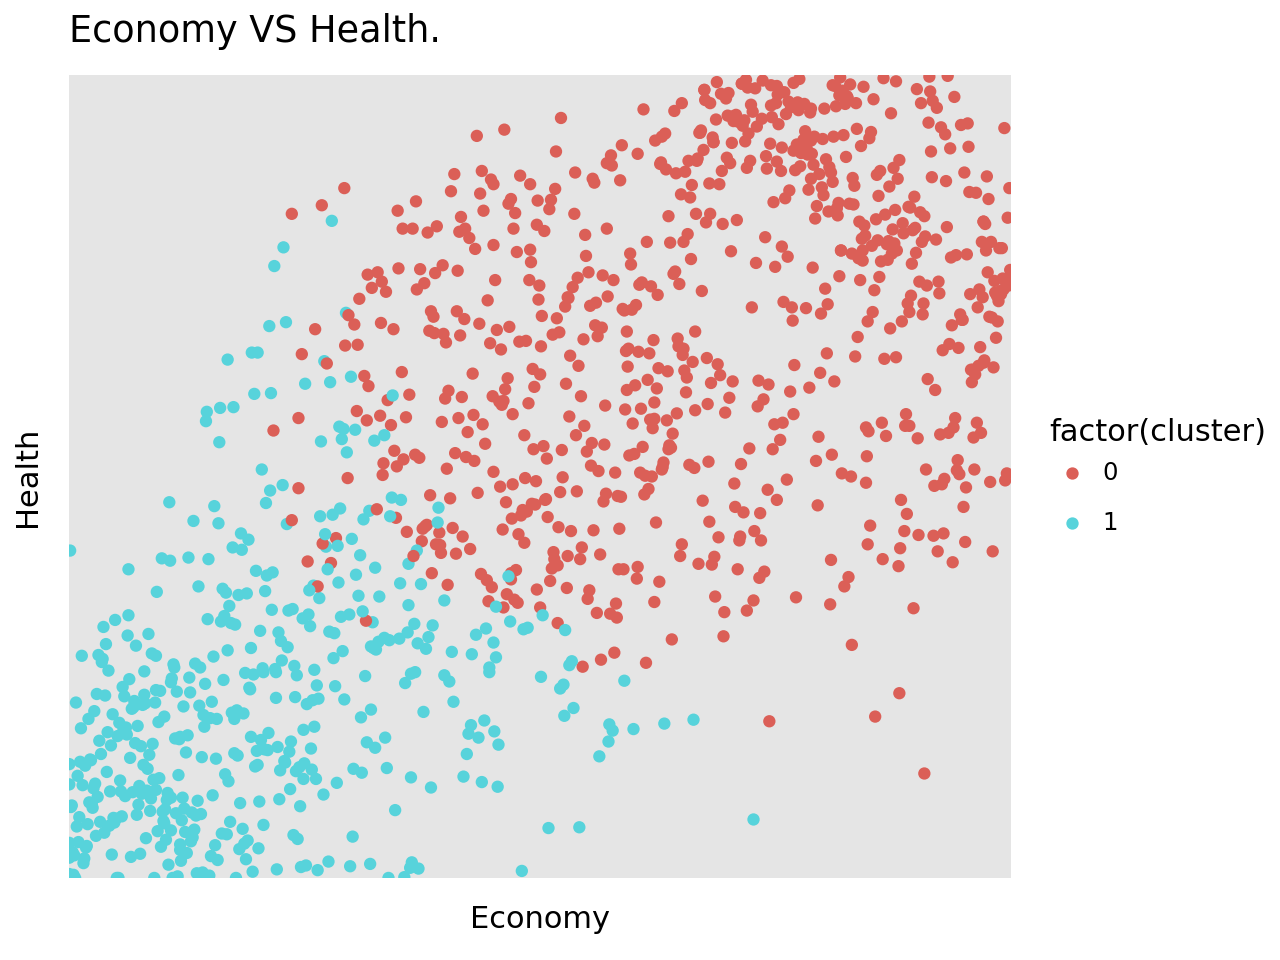

<Figure Size: (640 x 480)>

In [36]:
(ggplot(data, aes(x = "Economy (GDP per Capita)", y = "Health (Life Expectancy)", color = "factor(cluster)")) + \
 geom_point() + theme_minimal() + ggtitle("Economy VS Health.") + labs(x = "Economy", y = "Health") + \
 theme(axis_text_x = element_blank(), axis_text_y = element_blank()))

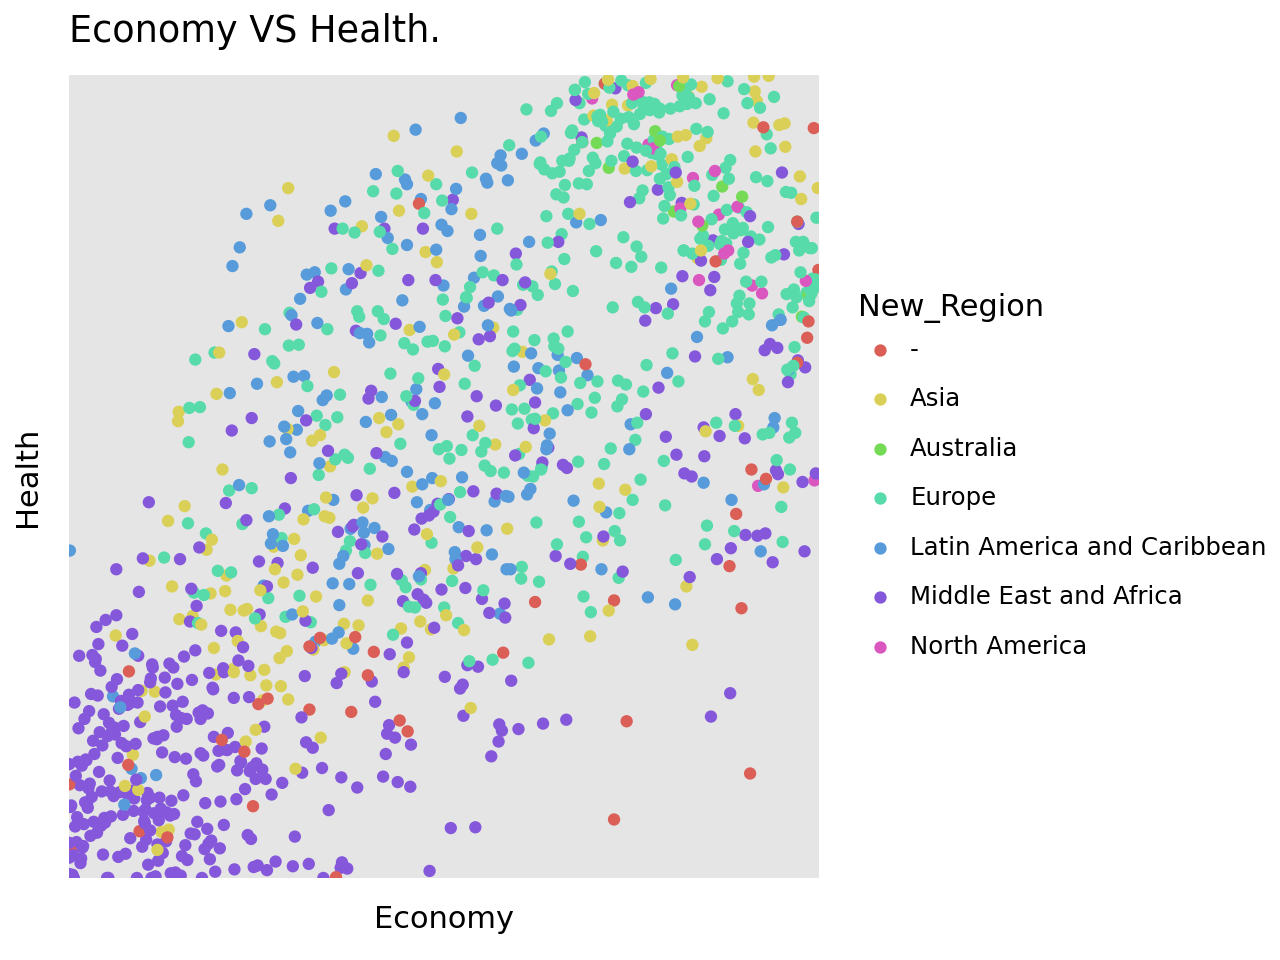

<Figure Size: (640 x 480)>

In [37]:
(ggplot(data, aes(x = "Economy (GDP per Capita)", y = "Health (Life Expectancy)", color = "New_Region")) + \
 geom_point() + theme_minimal() + ggtitle("Economy VS Health.") + labs(x = "Economy", y = "Health") + \
 theme(axis_text_x = element_blank(), axis_text_y = element_blank()))

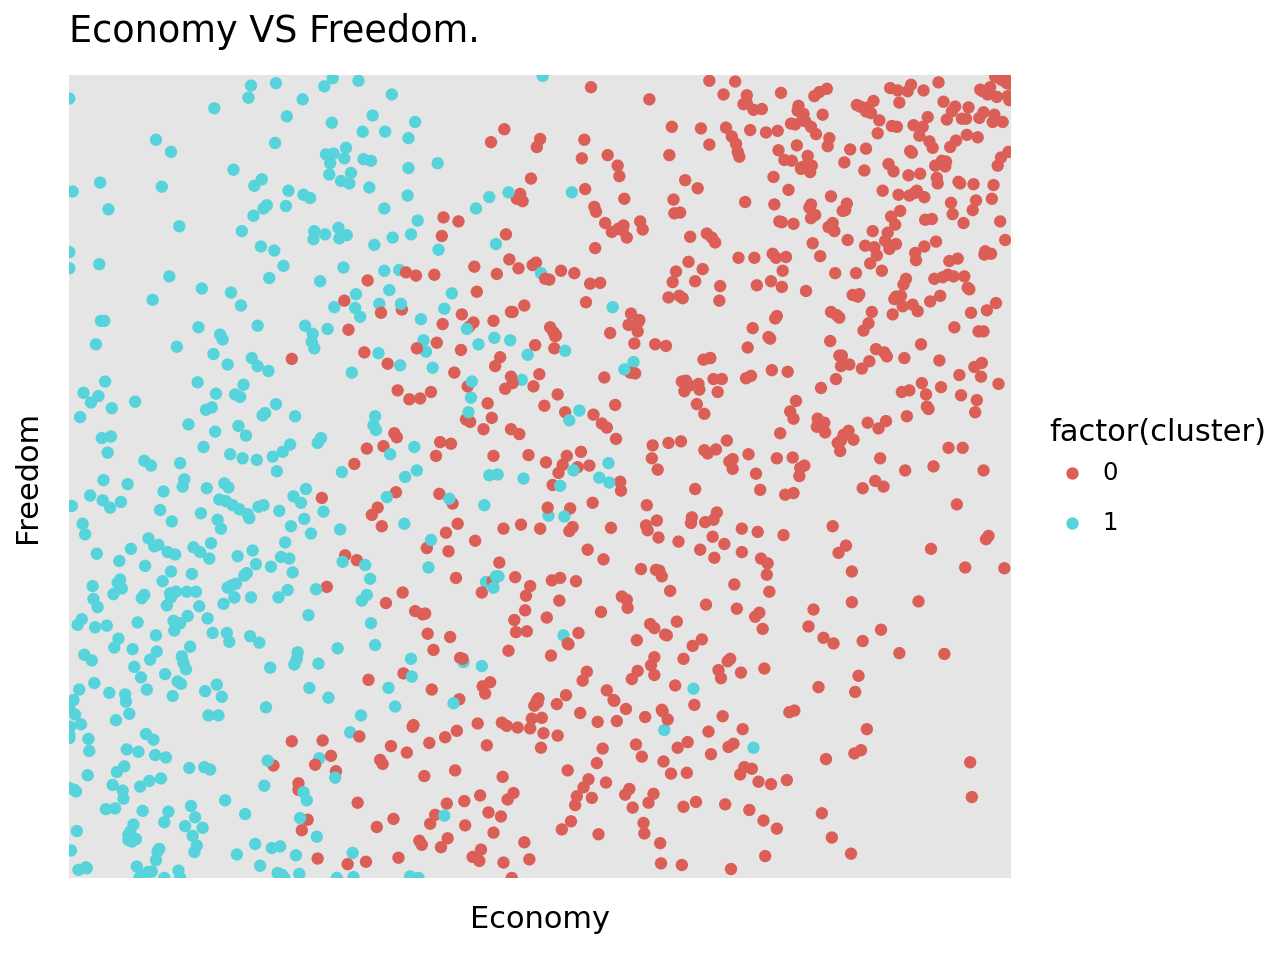

<Figure Size: (640 x 480)>

In [38]:
(ggplot(data, aes(x = "Economy (GDP per Capita)", y = "Freedom", color = "factor(cluster)")) + \
 geom_point() + theme_minimal() + ggtitle("Economy VS Freedom.") + labs(x = "Economy", y = "Freedom") + \
 theme(axis_text_x = element_blank(), axis_text_y = element_blank()))

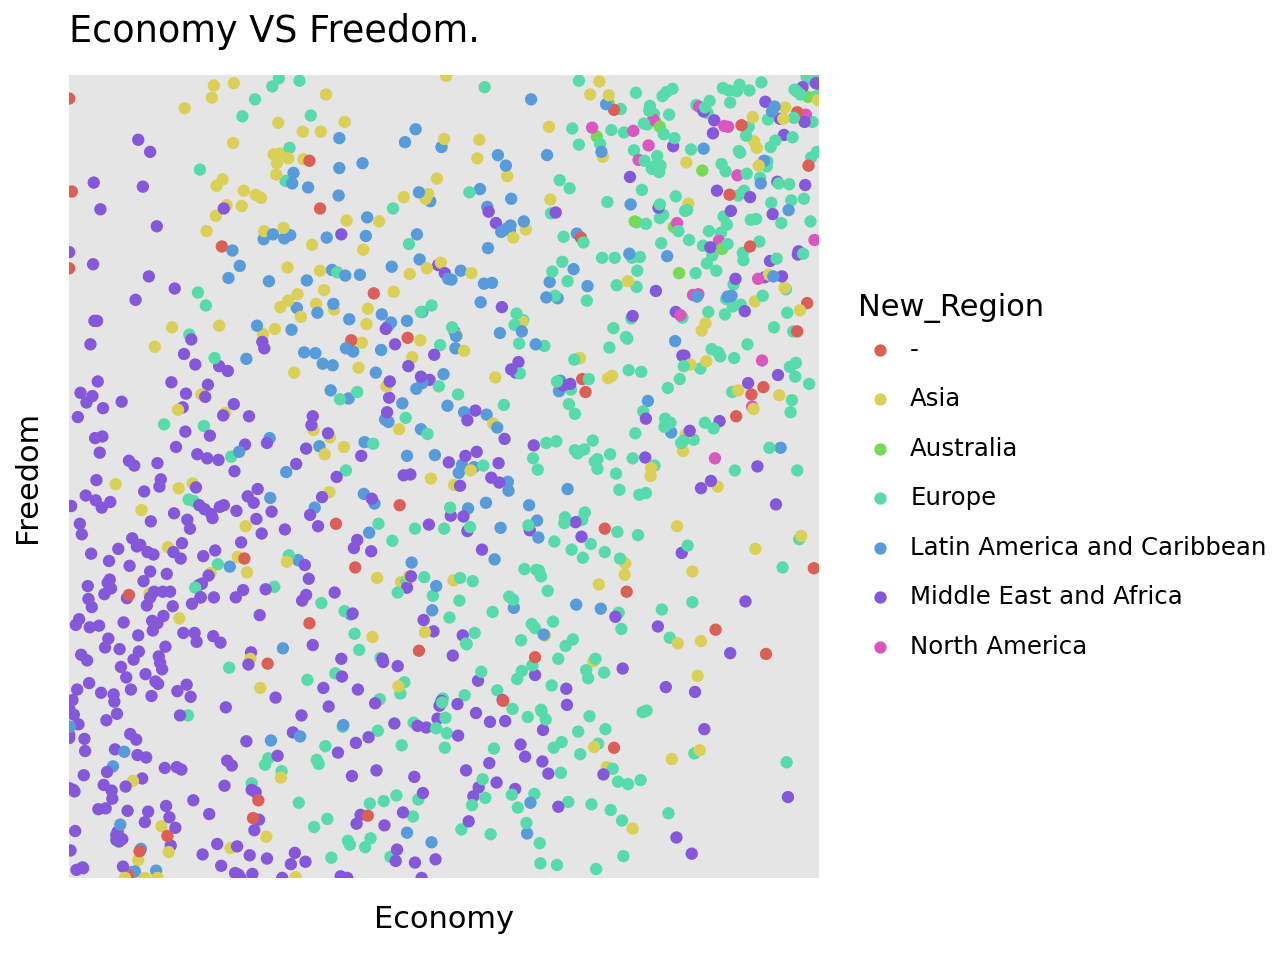

<Figure Size: (640 x 480)>

In [39]:
(ggplot(data, aes(x = "Economy (GDP per Capita)", y = "Freedom", color = "New_Region")) + \
 geom_point() + theme_minimal() + ggtitle("Economy VS Freedom.") + labs(x = "Economy", y = "Freedom") + \
 theme(axis_text_x = element_blank(), axis_text_y = element_blank()))

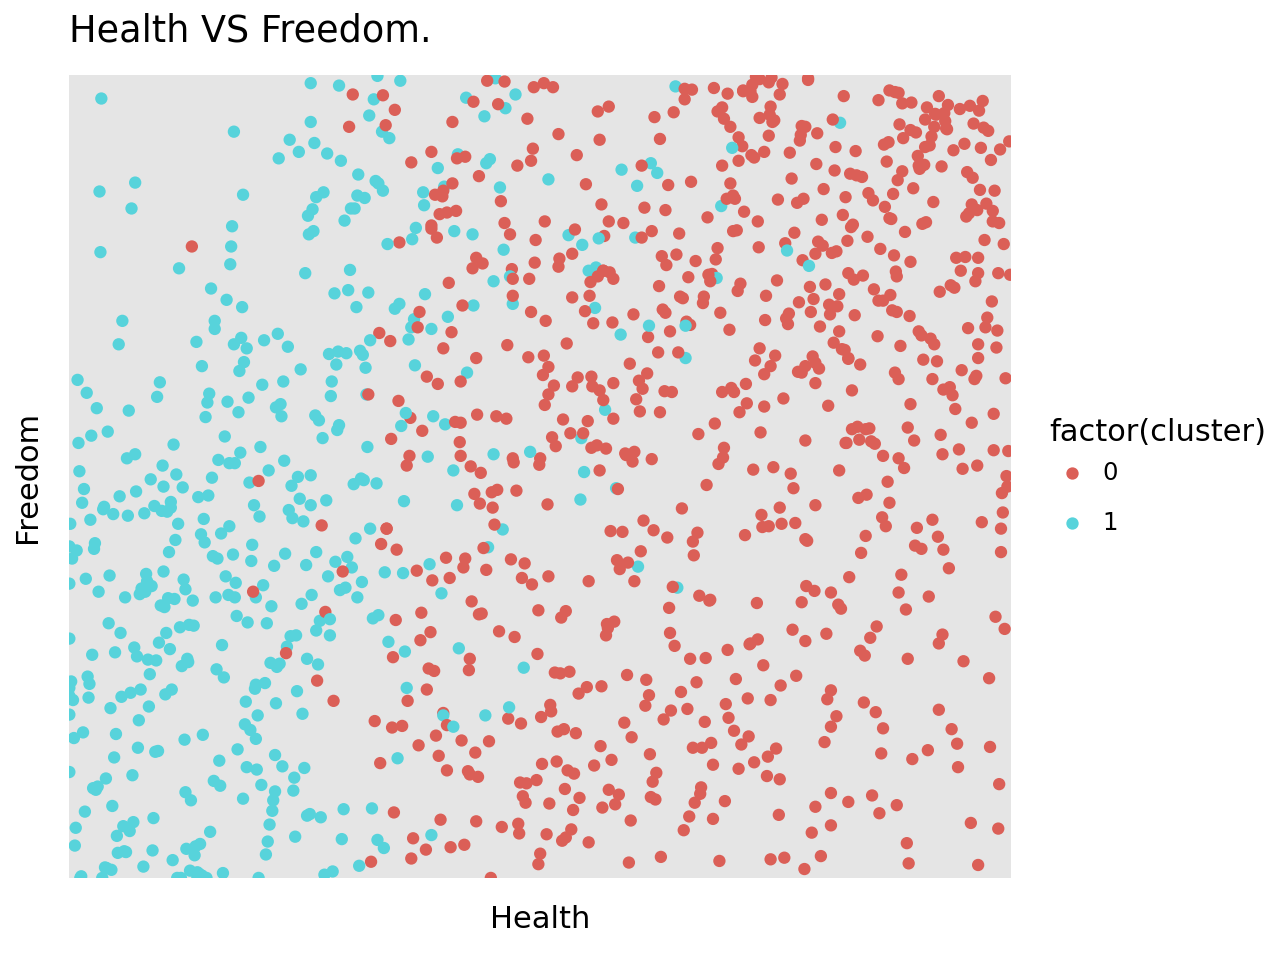

<Figure Size: (640 x 480)>

In [40]:
(ggplot(data, aes(x = "Health (Life Expectancy)", y = "Freedom", color = "factor(cluster)")) + \
 geom_point() + theme_minimal() + ggtitle("Health VS Freedom.") + labs(x = "Health", y = "Freedom") + \
 theme(axis_text_x = element_blank(), axis_text_y = element_blank()))

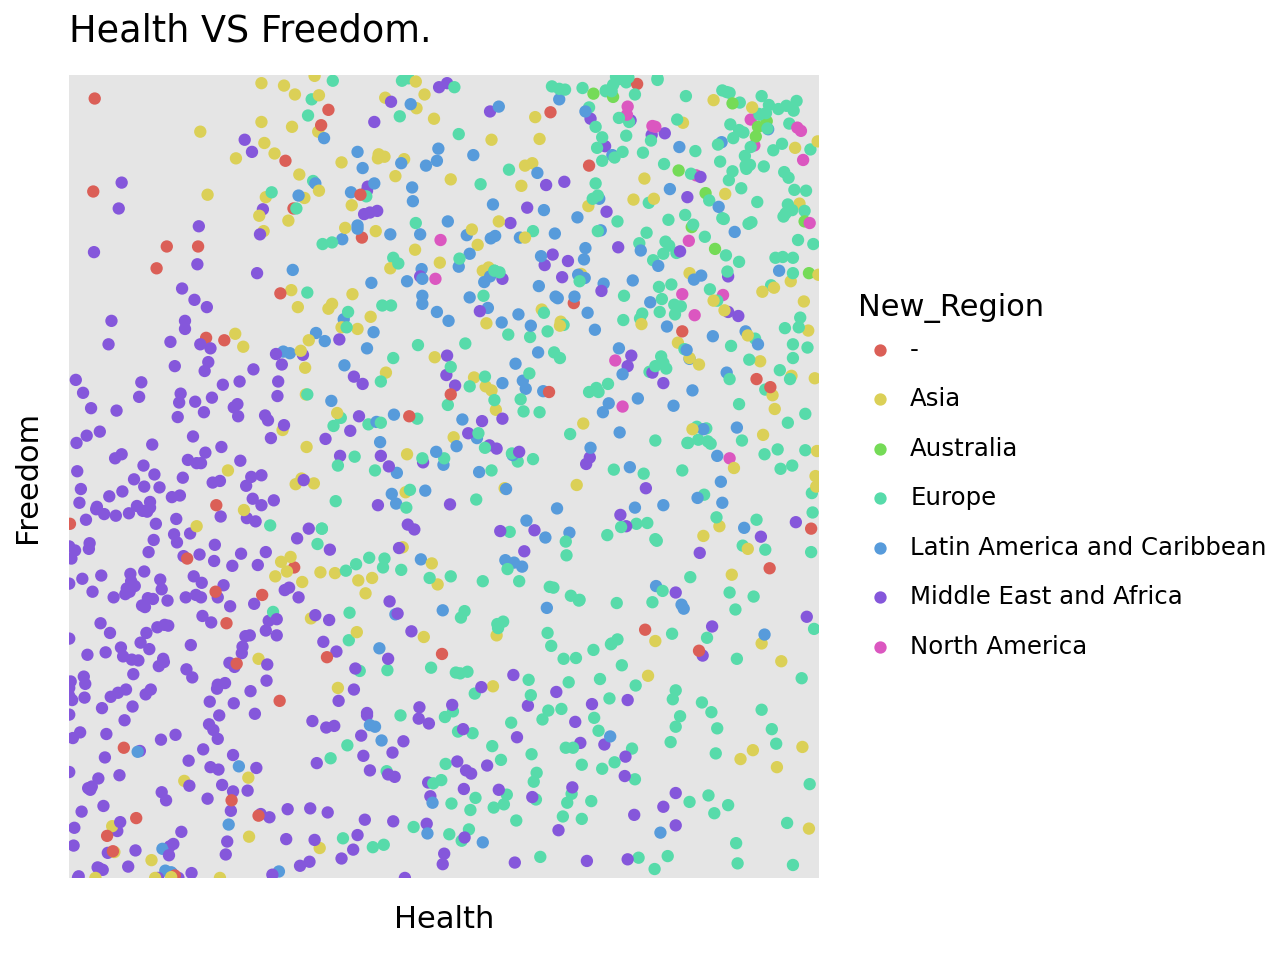

<Figure Size: (640 x 480)>

In [41]:
(ggplot(data, aes(x = "Health (Life Expectancy)", y = "Freedom", color = "New_Region")) + \
 geom_point() + theme_minimal() + ggtitle("Health VS Freedom.") + labs(x = "Health", y = "Freedom") + \
 theme(axis_text_x = element_blank(), axis_text_y = element_blank()))

Answer for Question 3

The first graph is colored based on clusters and the following graph is colored based on regions and I did this for all three variables. All the clusters seem to overlap a bit and aren't very cohesive so our clustering is not the best.

First we have Economy vs Health. We see a clear divide in the data points with the top being a cluster and the bottom being one. We see that most middle east and african countries are in the blue cluster that tells us both health and economy are low so we could consider them to be LEDC. On the other hand we see a lot of European countries in the red cluster that tells us they are high in both variables hence could be MEDC. Asian countries are kinda all over the place which we see in the real world too as some are more economically developed than others.

Mext we have Economy vs Freedom. This time with the left being a cluster and the right being the other. When comparing it to the different regions, we see that most middle east and african countries are in the blue cluster that tells us they have low economy but vary in freedom. This could be due to wars and differences in governments. The red cluster has most of the remaining regions and so they vary a lot in both variables and this is probably due to differences in governments and their laws.

Lastly we have Health vs Freesdom. We see a clear divide in the data points with the left being a cluster and the right being the other just like the previous one. When comparing it to the different regions, we see that most middle east and african countries are in the blue cluster that tells us they are lower in health but still vary in freedom. This could be due to differences in governments and conflicts between them. The red cluster has most of the remaining regions and so they vary a lot in both variables and this is probably due to differences in governments and access to healthcare.


In [ ]:
# doesn't show this cells output when downloading PDF
!pip install gwpy &> /dev/null

# installing necessary files
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

# installing pypandoc
!pip install pypandoc

# connecting your google drive
from google.colab import drive
drive.mount('/content/drive')

# copying your file over. Change "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!cp "drive/My Drive/Final_Esha.ipynb" ./

# Again, replace "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!jupyter nbconvert --to PDF "Final_Esha.ipynb"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
pandoc set to manually installed.
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1
  libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby
  ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
  xfonts-encodings xfonts-utils
Suggested packages:
